### Filter 'species' from hotspot


In [1]:
import fnmatch
import os
import pandas as pd

In [2]:
# DIR = 'ecosystem-embedding/hotspot_all_csv_v3/'

Find number of files in the directory

In [3]:
# List of all 'species' (including the ones which had incorrect names corrected)
all_species = pd.read_csv('data_processing/utils/684_species_with_correct_names.csv')

all_species_list = all_species['scientific_name'].tolist()
print("length of species:", len(all_species_list))

length of species: 684


In [4]:
# 3764

import os
import pandas as pd

hotspot_path = '/miniscratch/srishtiy/hotspot_csv_data/'

def each_hotspot_df(idx, category = 'species'):
    """ Returns a dataframe of category -> species
    
    Parameters
    ----------
    idx              :int
                     index number of the file in list array
    category         :str
                     column name of the datframe being filtered
                     deafult: "species"
               
    Returns
    -------
    df_species_aba : dataframe
                     filtered hotspot dataframe with only <category> and 
                     having scientific name present in all_species.csv
    """
    
    os.listdir(hotspot_path)[idx]
    hotspot_csv = hotspot_path + os.listdir(hotspot_path)[idx]
    print("csv file: ", hotspot_csv)

    # Read the hotspot csv
    df = pd.read_csv(hotspot_csv)
    print("Original dimention of data:", df.shape)

    
    # print("DF of original hotspot csv memory in KB: ", df.memory_usage(index=True).sum()/1024)
    df_species = df.loc[(df['CATEGORY'] == category) & (df['ALL SPECIES REPORTED'] == 1) ]
    df_species_inlist = df_species.loc[df_species['SCIENTIFIC NAME'].isin(all_species_list)]
    print("After filtering dimention of data:", df_species_inlist.shape)
    
    # Only add data till 2000 (and not before that)
    df_species_aba = df_species_inlist[(df_species_inlist["LAST EDITED DATE"] < "2021-05-01 00:00:00") & 
                                       (df_species_inlist["LAST EDITED DATE"] > "2000-01-01 00:00:00")]

    
    return df, df_species_aba

In [5]:
## test a hotspot
idx = 0
hotspot = os.listdir(hotspot_path)[idx].split('.')[0]
hotspot

'L8838283'

In [6]:
hotspot_path

'/miniscratch/srishtiy/hotspot_csv_data/'

In [7]:
## test starts

In [8]:
df, df_species_aba = each_hotspot_df(idx, 'species')

csv file:  /miniscratch/srishtiy/hotspot_csv_data/L8838283.csv
Original dimention of data: (853, 47)
After filtering dimention of data: (809, 47)


In [9]:
##tests end

In [10]:
df_species = df_species_aba[['Unnamed: 0', 'LAST EDITED DATE', 'CATEGORY','TAXONOMIC ORDER', 'COMMON NAME', 'SCIENTIFIC NAME', 
                           'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'OBSERVATION COUNT', 'BREEDING BIRD ATLAS CODE', 'BREEDING BIRD ATLAS CATEGORY', 
                           'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE', 'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK', 
                           'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE', 'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE', 'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 
                           'SAMPLING EVENT IDENTIFIER', 'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES', 'EFFORT DISTANCE KM', 'EFFORT AREA HA', 
                           'NUMBER OBSERVERS','ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED', 'REVIEWED', 'REASON', 'TRIP COMMENTS', 
                           'SPECIES COMMENTS','GLOBAL UNIQUE IDENTIFIER']]
print(df_species.shape)
# df_species.head()

(809, 47)


In [11]:
# df_species[["COMMON NAME", "SCIENTIFIC NAME", "LAST EDITED DATE", "OBSERVATION COUNT", "SAMPLING EVENT IDENTIFIER"]]

In [12]:
# df_species.nunique()

In [13]:
### test if a column has a date
# df_species['LAST EDITED DATE']
# df_species[df_species['LAST EDITED DATE' == '2018-10-08 20:05:46']]

In [14]:
df_species.tail()

,Unnamed: 0,LAST EDITED DATE,CATEGORY,TAXONOMIC ORDER,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,GLOBAL UNIQUE IDENTIFIER
847,875086371,2020-11-17 09:17:37,species,9697,Belted Kingfisher,Megaceryle alcyon,NaN,NaN,1,NaN,...,1.0,1,NaN,0,1,0,NaN,Ended at the azalea overlook but mainly along ...,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS1013214802
848,875101829,2020-07-25 06:40:43,species,7092,Great Blue Heron,Ardea herodias,NaN,NaN,3,NaN,...,2.0,1,NaN,0,1,0,NaN,NaN,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS960117545
849,875103973,2020-07-06 17:47:18,species,7156,Little Blue Heron,Egretta caerulea,NaN,NaN,8,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,"All juveniles, white plumage and yellow green ...",URN:CornellLabOfOrnithology:EBIRD:OBS952941743
850,875150246,2020-03-10 21:12:10,species,32055,Swamp Sparrow,Melospiza georgiana,NaN,NaN,6,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS874981866
852,875158262,2020-07-06 17:47:18,species,397,Wood Duck,Aix sponsa,NaN,NaN,10,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,Female with 4 ducklings,URN:CornellLabOfOrnithology:EBIRD:OBS952941732


### Test for a single hotspot

In [15]:
import warnings
warnings.filterwarnings('ignore')

### Extract months from the date and Time (to be used in bar chart)

In [16]:
df_species['LAST EDITED DATE'] = pd.to_datetime(df_species['LAST EDITED DATE'])
df_species.tail()

,Unnamed: 0,LAST EDITED DATE,CATEGORY,TAXONOMIC ORDER,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,BREEDING BIRD ATLAS CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,GLOBAL UNIQUE IDENTIFIER
847,875086371,2020-11-17 09:17:37,species,9697,Belted Kingfisher,Megaceryle alcyon,NaN,NaN,1,NaN,...,1.0,1,NaN,0,1,0,NaN,Ended at the azalea overlook but mainly along ...,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS1013214802
848,875101829,2020-07-25 06:40:43,species,7092,Great Blue Heron,Ardea herodias,NaN,NaN,3,NaN,...,2.0,1,NaN,0,1,0,NaN,NaN,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS960117545
849,875103973,2020-07-06 17:47:18,species,7156,Little Blue Heron,Egretta caerulea,NaN,NaN,8,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,"All juveniles, white plumage and yellow green ...",URN:CornellLabOfOrnithology:EBIRD:OBS952941743
850,875150246,2020-03-10 21:12:10,species,32055,Swamp Sparrow,Melospiza georgiana,NaN,NaN,6,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS874981866
852,875158262,2020-07-06 17:47:18,species,397,Wood Duck,Aix sponsa,NaN,NaN,10,NaN,...,1.0,1,NaN,0,1,0,NaN,NaN,Female with 4 ducklings,URN:CornellLabOfOrnithology:EBIRD:OBS952941732


In [17]:
df_species['Month'] = df_species['LAST EDITED DATE'].dt.month_name()

if 'MONTH' not in df_species:
    df_species.insert(df_species.columns.get_loc('LAST EDITED DATE'), 'MONTH', df_species['Month'] )
df_species.tail()

,Unnamed: 0,MONTH,LAST EDITED DATE,CATEGORY,TAXONOMIC ORDER,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,OBSERVATION COUNT,...,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,GLOBAL UNIQUE IDENTIFIER,Month
847,875086371,November,2020-11-17 09:17:37,species,9697,Belted Kingfisher,Megaceryle alcyon,NaN,NaN,1,...,1,NaN,0,1,0,NaN,Ended at the azalea overlook but mainly along ...,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS1013214802,November
848,875101829,July,2020-07-25 06:40:43,species,7092,Great Blue Heron,Ardea herodias,NaN,NaN,3,...,1,NaN,0,1,0,NaN,NaN,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS960117545,July
849,875103973,July,2020-07-06 17:47:18,species,7156,Little Blue Heron,Egretta caerulea,NaN,NaN,8,...,1,NaN,0,1,0,NaN,NaN,"All juveniles, white plumage and yellow green ...",URN:CornellLabOfOrnithology:EBIRD:OBS952941743,July
850,875150246,March,2020-03-10 21:12:10,species,32055,Swamp Sparrow,Melospiza georgiana,NaN,NaN,6,...,1,NaN,0,1,0,NaN,NaN,NaN,URN:CornellLabOfOrnithology:EBIRD:OBS874981866,March
852,875158262,July,2020-07-06 17:47:18,species,397,Wood Duck,Aix sponsa,NaN,NaN,10,...,1,NaN,0,1,0,NaN,NaN,Female with 4 ducklings,URN:CornellLabOfOrnithology:EBIRD:OBS952941732,July


In [18]:
### test if a date is present
# df.loc[df['column_name'] == some_value]
# df_species[df_species['LAST EDITED DATE' == '2018-10-08 20:05:46']

For next cell:
* To verify if `MONTH` column has correct columns use : `state_bird_month[state_bird_month["MONTH"].apply(lambda x:x not in months)]`
* To verify if `['OBSERVATION COUNT']` has only numeric values, ue: `state_bird_month.loc[~state_bird_month['OBSERVATION COUNT'].astype(str).str.isdigit()]`
* To verfy if any column has NaN values, use something like: `state_bird_month['COMMON NAME'].isnull().values.any()`

### Filter sected column which will ne needed to make bar chart
Columns needed are: "LOCALITY ID", "OBSERVATION COUNT", "COMMON NAME", "MONTH", "ALL SPECIES REPORTED"

In [19]:
state_bird_month = df_species[["LOCALITY ID", "OBSERVATION COUNT", "SCIENTIFIC NAME", "MONTH", "ALL SPECIES REPORTED","LATITUDE", "LONGITUDE"]]
state_bird_month["ALL SPECIES REPORTED"] = pd.to_numeric(state_bird_month["ALL SPECIES REPORTED"])
# state_bird_month = state_bird_month[state_bird_month["ALL SPECIES REPORTED"] == 1]
print(state_bird_month.shape)
state_bird_month.head()

(809, 7)


,LOCALITY ID,OBSERVATION COUNT,SCIENTIFIC NAME,MONTH,ALL SPECIES REPORTED,LATITUDE,LONGITUDE
0,L8838283,1,Toxostoma rufum,May,1,33.99419,-84.385593
1,L8838283,1,Sayornis phoebe,May,1,33.99419,-84.385593
2,L8838283,1,Thryothorus ludovicianus,May,1,33.99419,-84.385593
3,L8838283,5,Gallinago delicata,May,1,33.99419,-84.385593
4,L8838283,1,Ardea herodias,May,1,33.99419,-84.385593


In [20]:
# state_bird_month.info

### Add all the species to the list (from unique species list)

In [21]:
# unique_species_csv =  pd.read_csv('unique_species.csv')
# unique_species_list = list(unique_species_csv.unique_species)

unique_species_list = all_species_list
print("Number of unique species:", len(unique_species_list))

Number of unique species: 684


In [22]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [23]:
# For each column if value is not in list, add row

species_not_exist_list = []
for column in state_bird_month['SCIENTIFIC NAME']:
#     print(type(column))
    column = [column]
#     print(column)
    if column not in unique_species_list:
#         print(column)
        species_not_exist_list.append(column)

print("Number of species to be added:", len(species_not_exist_list))
species_not_exist_list[0]

Number of species to be added: 809


['Toxostoma rufum']

### Create a new dataframe where existent species not present in certain months, can be given some values

In [24]:
# Ques: OBSERVATION COUNT is atleast 1?

def absent_month(all_months, this_month):
    this_month = [this_month]
    abs_month = list(set(all_months) - set(this_month))
    return abs_month
    

# Make DF for species that are in ebird and in ABA code but don't have all months

species_exist_no_month_current_data = []


for idx, seriesdata in state_bird_month.iterrows():
    species = seriesdata['SCIENTIFIC NAME']
    month = seriesdata['MONTH']
    lat   = seriesdata["LATITUDE"]
    long  = seriesdata["LONGITUDE"]
    abs_month_list = []
    abs_month_list = absent_month(months, month)
    for i in range(len(abs_month_list)):
        species_exist_no_month_data = [hotspot, 0, species, abs_month_list[i], 0, lat, long] #dataframe format
        species_exist_no_month_current_data.append(species_exist_no_month_data)

In [25]:
species_exist_no_month_current_data[0]

['L8838283', 0, 'Toxostoma rufum', 'January', 0, 33.9941903, -84.3855935]

In [26]:
species_exist_no_month_current_df= pd.DataFrame(species_exist_no_month_current_data, columns =["LOCALITY ID", "OBSERVATION COUNT",  "SCIENTIFIC NAME", "MONTH", "ALL SPECIES REPORTED", "LATITUDE", "LONGITUDE"])
species_exist_no_month_current_df.shape
print(species_exist_no_month_current_df.nunique())
print(type(species_exist_no_month_current_df['MONTH']))
print(type(species_exist_no_month_current_df['LATITUDE']))

LOCALITY ID              1
OBSERVATION COUNT        1
SCIENTIFIC NAME         85
MONTH                   12
ALL SPECIES REPORTED     1
LATITUDE                 1
LONGITUDE                1
dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [27]:
frames_first = [state_bird_month, species_exist_no_month_current_df]
concat_species_first = pd.concat(frames_first)

first_concate = 'Yes'

if first_concate == 'Yes':
    state_bird_month_concat = concat_species_first
    # print(state_bird_month.head(10))
    # pd.concat(frames_first)
    state_bird_month_concat.shape
    print(state_bird_month_concat.nunique())
else:
    state_bird_month_concat = state_bird_month
    state_bird_month_concat.shape
    print(state_bird_month_concat.nunique())

LOCALITY ID              1
OBSERVATION COUNT       34
SCIENTIFIC NAME         85
MONTH                   12
ALL SPECIES REPORTED     2
LATITUDE                 1
LONGITUDE                1
dtype: int64


### Add non-existent species data in current data

In [28]:
state_bird_month = state_bird_month_concat
state_bird_month.shape
print(type(state_bird_month))

<class 'pandas.core.frame.DataFrame'>


### Sort the filtered data with respect to column

In [29]:
state_bird_month['MONTH'] = pd.Categorical(state_bird_month['MONTH'], categories=months, ordered=True)
state_bird_month.sort_values(by='MONTH',inplace=True) # Sort from Jan - December
state_bird_month['MONTH'] = state_bird_month['MONTH'].astype(object)
print(state_bird_month.nunique())
state_bird_month.head()

LOCALITY ID              1
OBSERVATION COUNT       34
SCIENTIFIC NAME         85
MONTH                   12
ALL SPECIES REPORTED     2
LATITUDE                 1
LONGITUDE                1
dtype: int64


,LOCALITY ID,OBSERVATION COUNT,SCIENTIFIC NAME,MONTH,ALL SPECIES REPORTED,LATITUDE,LONGITUDE
1078,L8838283,0,Buteo lineatus,January,0,33.99419,-84.385593
3377,L8838283,0,Branta canadensis,January,0,33.99419,-84.385593
4037,L8838283,0,Sitta carolinensis,January,0,33.99419,-84.385593
5841,L8838283,0,Anas platyrhynchos,January,0,33.99419,-84.385593
7513,L8838283,0,Corvus brachyrhynchos,January,0,33.99419,-84.385593


### Verify the values are correct after filteration

In [30]:
# old_df = hotspot_species_ones_and_twos[(hotspot_species_ones_and_twos["COMMON NAME"] == "Red-necked Grebe") & 
#                 (hotspot_species_ones_and_twos["MONTH"] == "January")
#                         ]
# new_df = state_bird_month[(state_bird_month["COMMON NAME"] == "Red-necked Grebe") & 
#                 (state_bird_month["MONTH"] == "January")
#                          ]
                         
# print("Old DF:", old_df[["OBSERVATION COUNT", "ALL SPECIES REPORTED"]])
# print("New DF:", new_df[["OBSERVATION COUNT", "ALL SPECIES REPORTED"]])

### Map the months (string) with numbers for proper sorting 

In [31]:
months_dict = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6,
          "July":7, "August":8, "September":9, "October":10, "November":11, "December":12
         }
state_bird_month_num = state_bird_month.MONTH.map(months_dict)

if 'Month_Num' not in state_bird_month:
    state_bird_month.insert(0, "Month_Num", state_bird_month_num)
print("Unique number of species:", state_bird_month["SCIENTIFIC NAME"].nunique())

print(state_bird_month.shape)
print(state_bird_month.nunique())
state_bird_month.head()

Unique number of species: 85
(9708, 8)
Month_Num               12
LOCALITY ID              1
OBSERVATION COUNT       34
SCIENTIFIC NAME         85
MONTH                   12
ALL SPECIES REPORTED     2
LATITUDE                 1
LONGITUDE                1
dtype: int64


,Month_Num,LOCALITY ID,OBSERVATION COUNT,SCIENTIFIC NAME,MONTH,ALL SPECIES REPORTED,LATITUDE,LONGITUDE
1078,1,L8838283,0,Buteo lineatus,January,0,33.99419,-84.385593
3377,1,L8838283,0,Branta canadensis,January,0,33.99419,-84.385593
4037,1,L8838283,0,Sitta carolinensis,January,0,33.99419,-84.385593
5841,1,L8838283,0,Anas platyrhynchos,January,0,33.99419,-84.385593
7513,1,L8838283,0,Corvus brachyrhynchos,January,0,33.99419,-84.385593


### Create bar chart data

In [32]:
state_bird_month_sum = state_bird_month.groupby(['Month_Num','MONTH','SCIENTIFIC NAME', 'LATITUDE', 'LONGITUDE'])[['ALL SPECIES REPORTED']].agg('sum')
print("Shape of bar chart data:", state_bird_month_sum.shape)
state_bird_month_sum.head(10)

Shape of bar chart data: (1020, 1)


ALL SPECIES REPORTED
Month_Num MONTH   SCIENTIFIC NAME      LATITUDE LONGITUDE                       
1         January Actitis macularius   33.99419 -84.385593                     0
                  Agelaius phoeniceus  33.99419 -84.385593                     0
                  Aix sponsa           33.99419 -84.385593                     0
                  Anas platyrhynchos   33.99419 -84.385593                     2
                  Archilochus colubris 33.99419 -84.385593                     0
                  Ardea alba           33.99419 -84.385593                     0
                  Ardea herodias       33.99419 -84.385593                     2
                  Baeolophus bicolor   33.99419 -84.385593                     2
                  Bombycilla cedrorum  33.99419 -84.385593                     1
                  Branta canadensis    33.99419 -84.385593                     1

In [33]:
all_data = state_bird_month_sum.reset_index()
all_data.head()

,Month_Num,MONTH,SCIENTIFIC NAME,LATITUDE,LONGITUDE,ALL SPECIES REPORTED
0,1,January,Actitis macularius,33.99419,-84.385593,0
1,1,January,Agelaius phoeniceus,33.99419,-84.385593,0
2,1,January,Aix sponsa,33.99419,-84.385593,0
3,1,January,Anas platyrhynchos,33.99419,-84.385593,2
4,1,January,Archilochus colubris,33.99419,-84.385593,0


In [34]:
all_data[(all_data["SCIENTIFIC NAME"]=="Actitis macularius") & (all_data["MONTH"]=="January")]

,Month_Num,MONTH,SCIENTIFIC NAME,LATITUDE,LONGITUDE,ALL SPECIES REPORTED
0,1,January,Actitis macularius,33.99419,-84.385593,0


In [35]:
### get the matrix of hotspot with species
matrix = all_data.pivot_table("ALL SPECIES REPORTED", "SCIENTIFIC NAME", "Month_Num")
print(type(matrix))
matrix.head()

<class 'pandas.core.frame.DataFrame'>


Month_Num,1,2,3,4,5,6,7,8,9,10,11,12
SCIENTIFIC NAME,,,,,,,,,,,,
Actitis macularius,0,0,0,0,0,1,0,0,0,0,0,0
Agelaius phoeniceus,0,2,2,0,1,10,5,0,1,0,3,2
Aix sponsa,0,0,2,0,0,1,5,1,0,0,1,0
Anas platyrhynchos,2,2,2,0,1,10,4,4,1,0,10,3
Archilochus colubris,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
matrix.shape

(85, 12)

### Plot bar Chart

Bar Chart dir Created


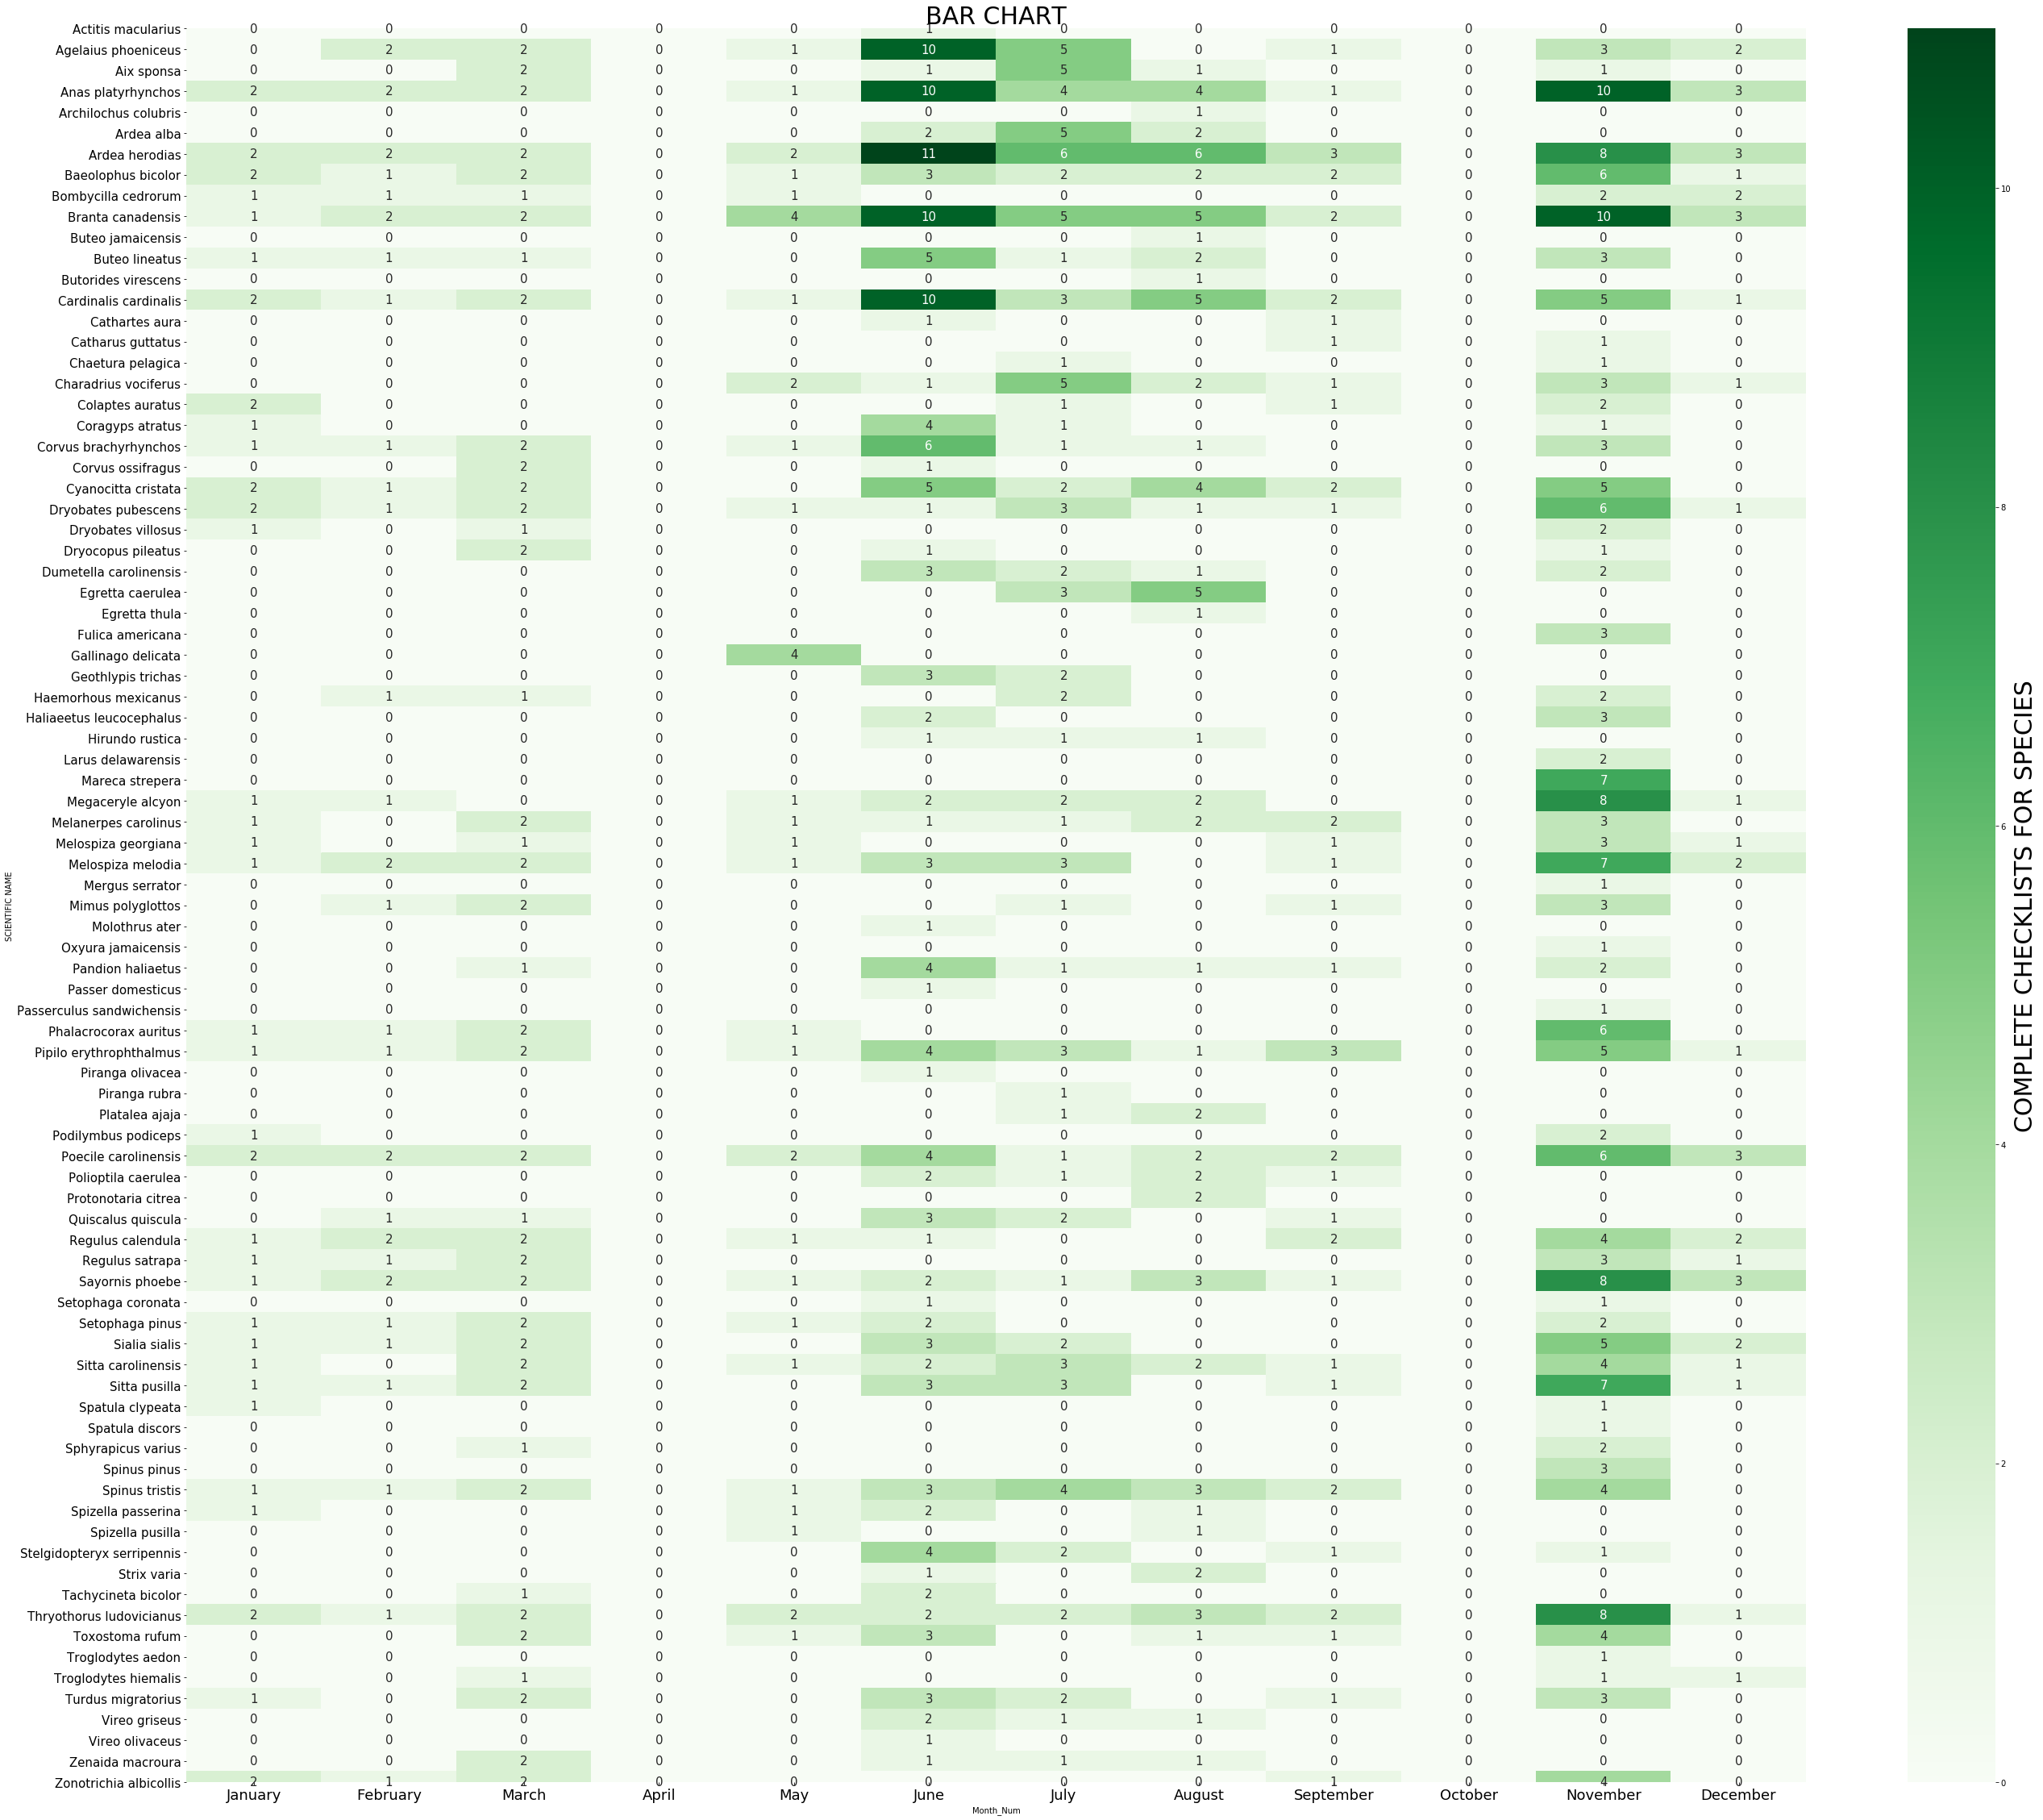

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline


# Folder where all bar charts will be saved
barchart_folder = 'bar_charts'

# # Delete directory if it exists and create a new one
# if os.path.exists(barchart_folder) == False:
#     print(" HBar Chart folder doesn't exist")

# if os.path.isdir(barchart_folder):
#     print("Exists")
#     shutil.rmtree(barchart_folder)
#     print("Deleted")
    
# os.mkdir(barchart_folder)
print("Bar Chart dir Created")

#--------------------------------------------#

df_temp = state_bird_month_sum.pivot_table("ALL SPECIES REPORTED", "SCIENTIFIC NAME", "Month_Num")

plt.figure(figsize = (45,40))
plt.title("BAR CHART", size=30)
# sns.light_palette("seagreen", as_cmap=True)
ax = sns.heatmap(df_temp, annot = True, cmap = "Greens", annot_kws={"fontsize":15},
                                                         cbar_kws={"label": 'COMPLETE CHECKLISTS FOR SPECIES'})

# Source: https://stackoverflow.com/questions/48586738/seaborn-heatmap-colorbar-label-font-size
cbar_axes = ax.figure.axes[-1]
ax.figure.axes[-1].yaxis.label.set_size(30)

ax.set_xticklabels(months, rotation='horizontal', fontsize=18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)

plt.savefig("bar_charts/bar_chart_" + hotspot + "_v1.png")
plt.show()

### Classs

In [45]:
class MyClass:
    def __init__(self, df_species, all_data):
        self.all_data = df_species
        self.species_count = all_data
        self.latitude = df_species['LATITUDE'].unique()
        self.longitude = df_species['LONGITUDE'].unique()
        self.state = df_species['STATE'].unique()
        self.country = df_species['COUNTRY'].unique()
        
a = MyClass(df_species, all_data)

In [47]:
a.latitude

array([33.9941903])

In [46]:
a.species_count

,Month_Num,MONTH,SCIENTIFIC NAME,LATITUDE,LONGITUDE,ALL SPECIES REPORTED
0,1,January,Actitis macularius,33.99419,-84.385593,0
1,1,January,Agelaius phoeniceus,33.99419,-84.385593,0
2,1,January,Aix sponsa,33.99419,-84.385593,0
3,1,January,Anas platyrhynchos,33.99419,-84.385593,2
4,1,January,Archilochus colubris,33.99419,-84.385593,0
...,...,...,...,...,...,...
1015,12,December,Turdus migratorius,33.99419,-84.385593,0
1016,12,December,Vireo griseus,33.99419,-84.385593,0
1017,12,December,Vireo olivaceus,33.99419,-84.385593,0
1018,12,December,Zenaida macroura,33.99419,-84.385593,0
